In [1]:
# 1. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

In [3]:
# 2. Load and preview the dataset
df = pd.read_csv(r"student_scores.csv")  # Update the path if needed
print(df.head())
print(df.describe())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


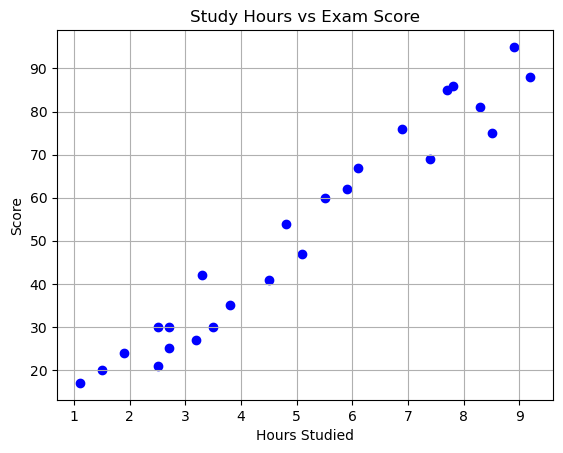

In [4]:
# 3. Visualize the relationship between hours and scores
plt.scatter(df['Hours'], df['Scores'], color='blue')
plt.title("Study Hours vs Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.grid(True)
plt.show()

In [ ]:

# 4. Prepare the features and target
X = df[['Hours']]  # Independent variable (2D)
y = df['Scores']   # Dependent variable

# 5. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 6. Train the linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# 7. Display model parameters
print(f"Model Equation: Score = {reg.intercept_:.2f} + {reg.coef_[0]:.2f} * Hours")

# 8. Predict on test data and evaluate
y_pred = reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# 9. Visualize the regression line
plt.scatter(X, y, color='lightblue', label='Actual Data')
plt.plot(X, reg.predict(X), color='red', label='Regression Line')
plt.title("Fitted Regression Line")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

# 10. Predict a custom input (e.g., 5.5 hours studied)
hours = [[5.5]]
predicted = reg.predict(hours)
print(f"Predicted score for 5.5 hours studied: {predicted[0]:.2f}")

# 11. Save the trained model
joblib.dump(reg, "student_model.pkl")

# 12. Tabulate actual vs predicted values
results = pd.DataFrame({
    "Hours Studied": X_test.squeeze(),
    "Actual Score": y_test.values,
    "Predicted Score": y_pred,
    "Absolute Error": abs(y_test.values - y_pred)
})
print("\nPrediction Summary:\n", results)